In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Convolutional Neural Networks are Neural Networks specifically designed to work on images__


- This is made possible thanks to __convolution operations__.


- These specific mathematical operations apply a __filter__ (i.e. a set of kernels, one per channel) to an input image  and create an __output representation__. For Convolutional Neural Networks, this can also be called:
    - a __"convoluted representation/feature"__,
    - or a __"convolution"__,
    - or also an __"activation"__ (as it corresponds to the activation of a given layer).
    
-------------------------------------------------------------------------------------------------------------------------------


__Remarks__:


- it is important to understand that __the same kernel (i.e. the same weights) is applied to different areas of the images__.


- This is completely different from Dense Neural Networks:
    - in __Dense/"Fully Connected" Neural Networks__, each weight of a given neuron is related to only one input coordinate (which, in images, would correspond to one pixel).
    - in __Convolutional Neural Networks__, the weights of a kernel are not applied to only one feature input, i.e. one pixel, but to different pixels, "step by step".
    
    
We can think of each kernel (or each filter in the case of colored images) as a magnifying glass through which we can see the image. Similarly to our eyes, kernels cannot capture everything in a picture at once, but they __scan different parts of a picture to understand the whole picture that is being analyzed__. 

# Load the dataset

In [3]:
import os
import numpy as np
import pandas as pd

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

def load_data(path):
    nb_circles = 100
    nb_triangles = 100
    
    X, y = [], []
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        X.append(imread(c_path)[:, :, :1])
        y.append(0)
    
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        X.append(imread(t_path)[:, :, :1])
        y.append(1)
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
        
    return np.array(X), np.array(y)
        
X, y = load_data("https://wagon-public-datasets.s3.amazonaws.com/deep-learning-circles-triangles/")

/tmp/ipykernel_1632/1950120839.py:18: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  X.append(imread(c_path)[:, :, :1])
/tmp/ipykernel_1632/1950120839.py:23: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  X.append(imread(t_path)[:, :, :1])


In [4]:
X.shape

(200, 76, 78, 1)

- We need only one channel to compute the "blackness intensity" of a pixel with 0 corresponding to a black pixel and 1 corresponding to a white pixel. The last dimension corresponds to some kind of "Black to white channel".


- For colored images, the last dimension would be equal to 3 for Red, Green, Blue (RGB)

In [5]:
print(f'min value: {np.min(X)}')
print(f'max value: {np.max(X)}')

min value: 0.0
max value: 1.0


- There's no need to normalize the pixels' intensities. The data is already between 0 and 1

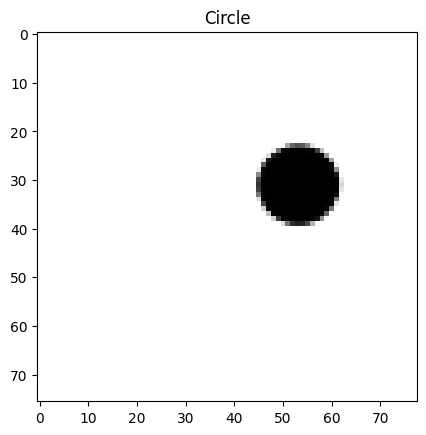

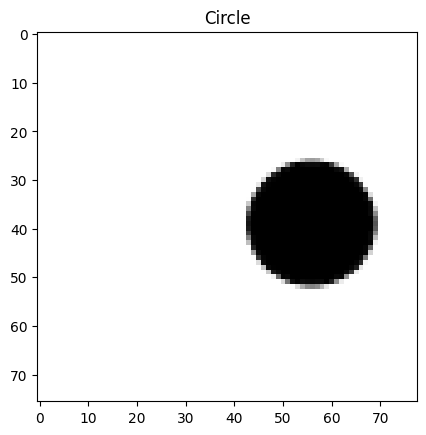

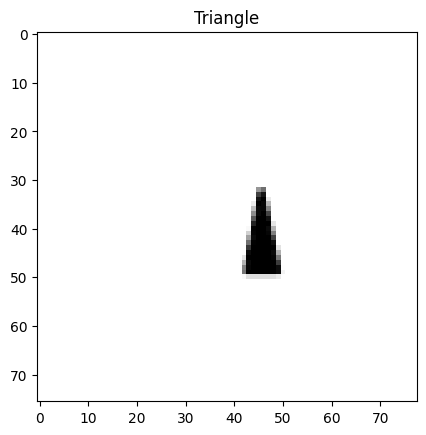

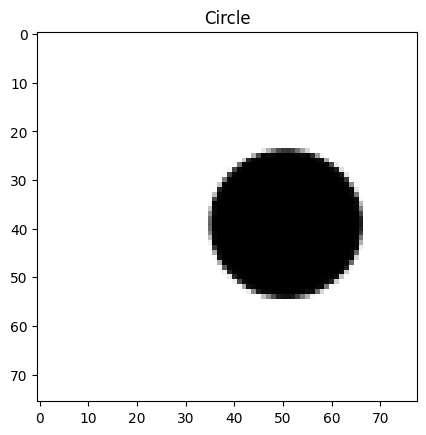

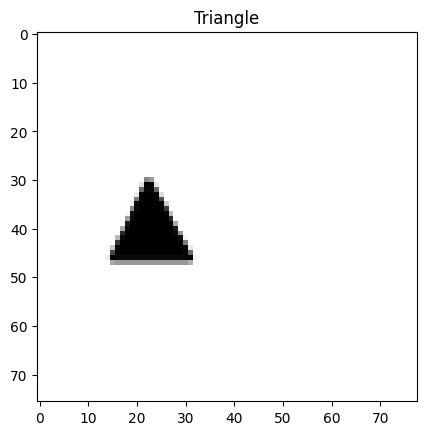

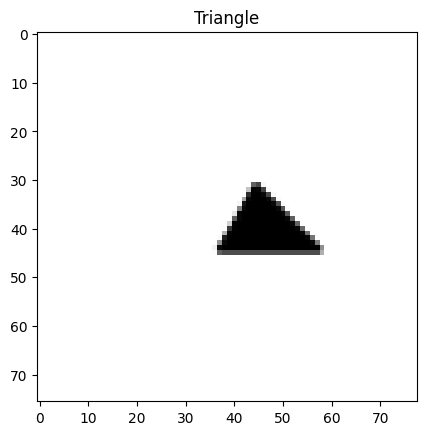

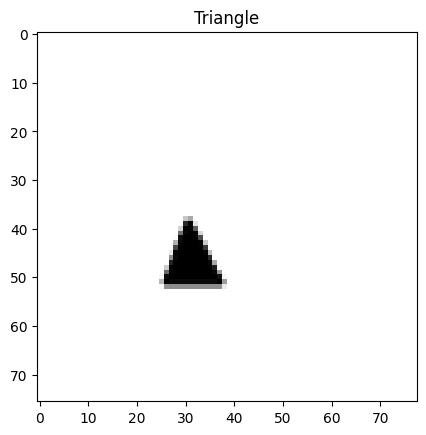

In [11]:
for iter_, (image, label) in enumerate(zip(X, y)):
    plt.imshow(image[:, :, 0], cmap='gray')
    plt.title('Triangle' if label == 1 else 'Circle')
    plt.show()
    
    if iter_ > 5:
        break

How many classes are we going to predict?

In [13]:
np.unique(y, return_counts=True)

(array([0, 1]), array([100, 100]))

We